# __Netflix Movies & TV Shows__ 📽️🍿

<img src="https://deeyah.com/wp-content/uploads/2018/06/NETFLIX--524x248.png" width=300>

## __I. Introduction__

__Netflix__ is subscription-based streaming service which offers online streaming of a wide variety of movies and television programs, including those produced in-house. According to Wikipedia, as of April 2020, Netflix had over 182 million paid subscriptions worldwide. It seems that Neflix's popularity are increasing day by day especially on this 'stay-at-home' situation. Therefore I thought it would be interesting to do some analysis on Netflix's contents as well as to build a content-based movies & TV shows recommendation system.

### __Tasks:__

1. Find out what contents are available on Netflix
2. Making a simple content-based recommendation system by matching text-based features to identify similar movies / TV shows

## __II. Exploratory Data Analysis__

### 1. __Import Libraries__

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math
from rake_nltk import Rake
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import joblib

### 2. __Load Dataset__

#### About the Dataset

In this project, I'm using __Netflix Movies and TV Shows__ dataset from https://www.kaggle.com/shivamb/netflix-shows.

This dataset consists of TV Shows and Movies available on Netflix as of 2019. It also includes some datas from early 2020. The dataset is collected from Flixable which is a third-party Netflix search engine.
- __show_id__ = Unique ID for every Movie / Tv Show
- __type__ = Identifier - A Movie or TV Show
- __title__ = Title of the Movie / Tv Show
- __director__ = Director of the Movie
- __cast__ = Actors involved in the Movie / TV Show
- __country__ = Country where the Movie / TV Show was produced
- __date_added__ = Date it was added on Netflix
- __release_year__ = Actual Release year of the Movie / TV Show
- __rating__ = TV Rating of the Movie / TV Show
- __duration__ = Total Duration - in minutes or number of seasons
- __listed_in__ = Genre of the Movie / TV Show
- __description__ = The summary description

In [138]:
df = pd.read_csv('netflix_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


### 3. __Cleaning Data__

#### Checking dataframe shape, info and columns labels

In [139]:
df.shape

(6234, 12)

The dataset has 6234 rows and 12 columns.

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [141]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

#### Checking for NaN values

In [142]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

As seen above, there are missing values (_NaN_) in this dataframe, specifically on ***director***, ***cast***, ***country***, ***date_added***, and ***rating*** columns. Down here I will execute some commands to show the rows with missing values.

In [143]:
isNaN = df.isnull()
RowHasNaN = isNaN.any(axis=1)
RowsWithNaN = df[RowHasNaN]
RowsWithNaN

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


There are totals of 2460 rows that have missing values. Before going further with the data analysis, I need to handle these missing values first.

#### Handling NaN values

In my opinion, there's no need to delete a whole row of a movie / TV show just because some of the information are missing. As long as the movie / TV show has its title and description I can still use it for the recommendation model later. 

- __Handling *NaN* values in *'director'* and *'cast'* column__
<br>I decide to replace the _NaN_ values with an empty string. 

In [144]:
df = df.fillna({
    'director': '',
    'cast': ''
})
df.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         476
date_added       11
release_year      0
rating           10
duration          0
listed_in         0
description       0
dtype: int64

- __Handling _NaN_ values in *'country'*__
<br>For the _'country'_ column, it's a bit tricky as I shouldn't fill the _NaN_ with another countries without any thoughts. Therefore, I'm going to try using the genre to determind the missing values. for _'country'_ column. 
<br>First, I will replace the missing values as 'Japan' for Anime genre _(as many anime are produced in Japan)_.

In [145]:
NaNCountryAnime = df[df['listed_in'].str.contains(r'Anime')][df['country'].isnull()].index.tolist()

<ipython-input-145-b4efeb8e72b6>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  NaNCountryAnime = df[df['listed_in'].str.contains(r'Anime')][df['country'].isnull()].index.tolist()


In [146]:
nan = np.NaN
df['country'].iloc[NaNCountryAnime] = df.iloc[NaNCountryAnime]['country'].replace(nan,'Japan')
df.isnull().sum()

c:\users\elsa\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


show_id           0
type              0
title             0
director          0
cast              0
country         468
date_added       11
release_year      0
rating           10
duration          0
listed_in         0
description       0
dtype: int64

- __Handling _NaN_ values in *'country'*__
<br>Next, I will replace the missing values as 'South Korea' for the ones which listed in 'Korean TV Show' genre.

In [147]:
NaNCountryKorean = df[df['listed_in'].str.contains(r'Korean')][df['country'].isnull()].index.tolist()

<ipython-input-147-ffd99e4091b1>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  NaNCountryKorean = df[df['listed_in'].str.contains(r'Korean')][df['country'].isnull()].index.tolist()


In [148]:
df['country'].iloc[NaNCountryKorean] = df.iloc[NaNCountryKorean]['country'].replace(nan,'South Korea')
df.isnull().sum()

show_id           0
type              0
title             0
director          0
cast              0
country         444
date_added       11
release_year      0
rating           10
duration          0
listed_in         0
description       0
dtype: int64

- __Handling _NaN_ values in *'country'*__
<br>Next, I checked again which rows still has the 'country' values missing. Here I see a lot of _'Krish Trish and Baltiboy'_. I searched on Google and found out that it is an Indian animation so I will replace the country in all _'Krish Trish and Baltiboy'_ film with 'India'

In [149]:
df[df['country'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
10,80169755,Movie,Joaquín Reyes: Una y no más,José Miguel Contreras,Joaquín Reyes,NaN,"September 8, 2017",2017,TV-MA,78 min,Stand-Up Comedy,Comedian and celebrity impersonator Joaquín Re...
12,80182480,Movie,Krish Trish and Baltiboy,,"Damandeep Singh Baggan, Smita Malhotra, Baba S...",NaN,"September 8, 2017",2009,TV-Y7,58 min,Children & Family Movies,"A team of minstrels, including a monkey, cat a..."
13,80182483,Movie,Krish Trish and Baltiboy: Battle of Wits,"Munjal Shroff, Tilak Shetty","Damandeep Singh Baggan, Smita Malhotra, Baba S...",NaN,"September 8, 2017",2013,TV-Y7,62 min,Children & Family Movies,"An artisan is cheated of his payment, a lion o..."
14,80182596,Movie,Krish Trish and Baltiboy: Best Friends Forever,"Munjal Shroff, Tilak Shetty","Damandeep Singh Baggan, Smita Malhotra, Deepak...",NaN,"September 8, 2017",2016,TV-Y,65 min,Children & Family Movies,"A cat, monkey and donkey team up to narrate fo..."
15,80182482,Movie,Krish Trish and Baltiboy: Comics of India,Tilak Shetty,"Damandeep Singh Baggan, Smita Malhotra, Baba S...",NaN,"September 8, 2017",2012,TV-Y7,61 min,Children & Family Movies,"In three comic-strip-style tales, a boy tries ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
6170,80136456,TV Show,Age of Glory,,"Debbie Goh, Aenie Wong, Frederick Lee, Leslie ...",NaN,"August 14, 2017",2010,TV-PG,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",Amid the thriving nightlife of 1960s Kuala Lum...
6195,80136790,TV Show,Goodnight DJ 1,,"Chan Fong, Z-Chen, Frederick Lee, Melvin Sia, ...",NaN,"April 27, 2018",2016,TV-14,2 Seasons,"International TV Shows, TV Dramas, TV Horror",Young radio announcers from varying background...
6199,80244228,TV Show,Beauty and the Bitches,,"Methinee Kingpayome, Son Songpaisarn, Yingying...",NaN,"April 23, 2019",2016,TV-14,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",Beauty pageant contestants from all over Thail...
6228,80159925,TV Show,Kikoriki,,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...


In [150]:
NaNCountryKrish = df[df['title'].str.contains(r'Krish Trish and Baltiboy')].index.tolist()

In [151]:
df['country'].iloc[NaNCountryKrish] = df.iloc[NaNCountryKrish]['country'].replace(nan,'India')
df.isnull().sum()

c:\users\elsa\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


show_id           0
type              0
title             0
director          0
cast              0
country         437
date_added       11
release_year      0
rating           10
duration          0
listed_in         0
description       0
dtype: int64

In [152]:
df[df['country'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
10,80169755,Movie,Joaquín Reyes: Una y no más,José Miguel Contreras,Joaquín Reyes,NaN,"September 8, 2017",2017,TV-MA,78 min,Stand-Up Comedy,Comedian and celebrity impersonator Joaquín Re...
26,80244601,TV Show,Castle of Stars,,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",NaN,"September 7, 2018",2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...
28,80190843,TV Show,First and Last,,,NaN,"September 7, 2018",2018,TV-MA,1 Season,Docuseries,Take an intimate look at the emotionally charg...
34,80221550,TV Show,Archibald's Next Big Thing,,"Tony Hale, Rosamund Pike, Jordan Fisher, Chels...",NaN,"September 6, 2019",2019,TV-Y7,1 Season,"Kids' TV, TV Comedies",Happy-go-lucky chicken Archibald may not remem...
36,81113928,Movie,Care of Kancharapalem,Maha Venkatesh,"Subba Rao Vepada, Radha Bessy, Kesava Karri, N...",NaN,"September 6, 2019",2018,TV-14,142 min,"Comedies, Dramas, Independent Movies",From a schoolboy’s crush to a middle-aged bach...
...,...,...,...,...,...,...,...,...,...,...,...,...
6170,80136456,TV Show,Age of Glory,,"Debbie Goh, Aenie Wong, Frederick Lee, Leslie ...",NaN,"August 14, 2017",2010,TV-PG,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",Amid the thriving nightlife of 1960s Kuala Lum...
6195,80136790,TV Show,Goodnight DJ 1,,"Chan Fong, Z-Chen, Frederick Lee, Melvin Sia, ...",NaN,"April 27, 2018",2016,TV-14,2 Seasons,"International TV Shows, TV Dramas, TV Horror",Young radio announcers from varying background...
6199,80244228,TV Show,Beauty and the Bitches,,"Methinee Kingpayome, Son Songpaisarn, Yingying...",NaN,"April 23, 2019",2016,TV-14,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",Beauty pageant contestants from all over Thail...
6228,80159925,TV Show,Kikoriki,,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...


- __Handling _NaN_ values in *'country'*__
<br>Lastly, because there are too much missing values in _'country'_ column _(there are still 437 row with 'country' missing)_ and there are no data in the dataset that I can use directly to predict which country a movie / TV show was produced in I will fill the rest of the missing values with _'unknown'_

In [153]:
df = df.fillna({'country': 'unknown'})
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      11
release_year     0
rating          10
duration         0
listed_in        0
description      0
dtype: int64

- __Handling _NaN_ values in *'date_added'* column__
<br>There are 11 movie / TV shows that have missing _'date_added'_ values. Since there's no data from the dataset that I can use to know when they added the movie / TV shows, I'm going to assume that they're newly added earlier this year on January 1, 2020.

In [154]:
df = df.fillna({'date_added': 'January 1, 2020'})

In [155]:
df['date_added'] = pd.to_datetime(df['date_added'])
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."


In [156]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating          10
duration         0
listed_in        0
description      0
dtype: int64

- __Handling _NaN_ values in *'rating'* column__
<br>First, I need to know what are the ratings and what they means.

In [157]:
df['rating'].unique()

array(['TV-PG', 'TV-MA', 'TV-Y7-FV', 'TV-Y7', 'TV-14', 'R', 'TV-Y', 'NR',
       'PG-13', 'TV-G', 'PG', 'G', nan, 'UR', 'NC-17'], dtype=object)

Ratings for TV _(source: https://en.wikipedia.org/wiki/TV_Parental_Guidelines)_:
- TV-Y : This program is designed to be appropriate for all children.
- TV-Y7 : This program is designed for children age 7 and above.
- TV-Y7-FV : This program is designed for children age 7 and above. Programs given the "FV" content descriptor exhibit more 'fantasy violence' and are generally more intense or combative than other programs rated TV-Y7.
- TV-G : This program is suitable for all ages though they may not necessarily contain content of interest to children. 
- TV-PG : This program contains material that parents may find unsuitable for younger children.
- TV-14 : This program contains some material that many parents would find unsuitable for children under 14 years of age.
- TV-MA : This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17.

Ratings for Movies _(source: https://en.wikipedia.org/wiki/Motion_Picture_Association_of_America_film_rating_system)_:
- G : General Audiences. All ages admitted. 
- PG : Parental Guidance Suggested. Some material may not be suitable for children.
- PG-13 : Parents Strongly Cautioned. Some material may be inappropriate for children under 13.
- R : Restricted. Under 17 requires accompanying parent or adult guardian.
- NC-17 : Adults Only. No One 17 and Under Admitted.
- NR : Not Rated. If a film has not been submitted for a rating or is an uncut version of a film that was submitted.
- UR : Unrated. If a film has not been submitted for a rating or is an uncut version of a film that was submitted.

In [158]:
df[df['rating'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
211,70129452,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
2411,80144119,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,2017-03-01,2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."
3288,80169801,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,,"Oprah Winfrey, Ava DuVernay",unknown,2017-01-26,2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
4056,80078037,TV Show,Little Lunch,,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,2018-02-01,2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
4402,80092839,Movie,Fireplace 4K: Classic Crackling Fireplace from...,George Ford,,unknown,2015-12-21,2015,NaN,60 min,Movies,"The first of its kind in UHD 4K, with the clea..."
4403,80092835,Movie,Fireplace 4K: Crackling Birchwood from Firepla...,George Ford,,unknown,2015-12-21,2015,NaN,60 min,Movies,"For the first time in 4K Ultra-HD, everyone's ..."
4706,80039789,TV Show,Gargantia on the Verdurous Planet,,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,2016-12-01,2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
5015,80114111,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
5234,80161109,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,,,unknown,2020-01-01,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...


- __Handling _NaN_ values in *'rating'* column__
<br>Because there are only 10 missing values, I will check the ratings manually. After searching the internet I found that:
    - All Louis C.K. related content above are rated 18+ or made for mature audience so I will fill the missing rating values with NC-17
    - Both of the Fireplace 4K is rated 'All' in Netflix so I will fill the missing values with G
    - Gargantia on the Verdurous Planet is rated TV-14 on IMDB
    - 13TH: A Conversation with Oprah Winfrey & Ava DuVernay is rated as PG-13 on Netflix
    - Little Baby Bum: Nursery Rhyme Friends is rated as 'All' on Netflix so I will fill the missing values with G
    - Little Lunch is a kids show but seems like it fit more older kids so I will fill the missing values with TV-Y7 _(I didn't find the actual TV rating for this title)_
    - My Honor Was Loyalty is rated as 18+ on Netflix so I will fill the missing values with NC-17

In [159]:
df['rating'][df['title'] == 'My Honor Was Loyalty'] = df[df['title'] == 'My Honor Was Loyalty']['rating'].replace(nan,'NC-17')
df['rating'][df['title'] == 'Little Baby Bum: Nursery Rhyme Friends'] = df[df['title'] == 'Little Baby Bum: Nursery Rhyme Friends']['rating'].replace(nan,'G')
df['rating'][df['title'] == 'Little Lunch'] = df[df['title'] == 'Little Lunch']['rating'].replace(nan,'TV-Y7')
df['rating'][df['title'] == 'Gargantia on the Verdurous Planet'] = df[df['title'] == 'Gargantia on the Verdurous Planet']['rating'].replace(nan,'TV-14')
df['rating'][df['title'] == '13TH: A Conversation with Oprah Winfrey & Ava DuVernay'] = df[df['title'] == '13TH: A Conversation with Oprah Winfrey & Ava DuVernay']['rating'].replace(nan,'PG-13')

<ipython-input-159-a232394c9054>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'][df['title'] == 'My Honor Was Loyalty'] = df[df['title'] == 'My Honor Was Loyalty']['rating'].replace(nan,'NC-17')
<ipython-input-159-a232394c9054>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'][df['title'] == 'Little Baby Bum: Nursery Rhyme Friends'] = df[df['title'] == 'Little Baby Bum: Nursery Rhyme Friends']['rating'].replace(nan,'G')
<ipython-input-159-a232394c9054>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pa

In [160]:
NaNRatingF4K = df[df['title'].str.contains(r'Fireplace 4K:')].index.tolist()
df['rating'].iloc[NaNRatingF4K] = df.iloc[NaNRatingF4K]['rating'].replace(nan,'G')
NaNRatingLCK = df[df['title'].str.contains(r'Louis C.K.')].index.tolist()
df['rating'].iloc[NaNRatingLCK] = df.iloc[NaNRatingLCK]['rating'].replace(nan,'NC-17')

c:\users\elsa\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [161]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### 4. __Data Visualization & Analysis__

#### Displaying cleaned dataframe

In [162]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


#### Setting style & palette for plotting

In [163]:
sb.set(style = "ticks", palette="pastel")

#### __Type of Contents__

In [164]:
typecounts = df['type'].value_counts()
type_x = typecounts.index.tolist()
type_y = typecounts.tolist()
type_y

[4265, 1969]

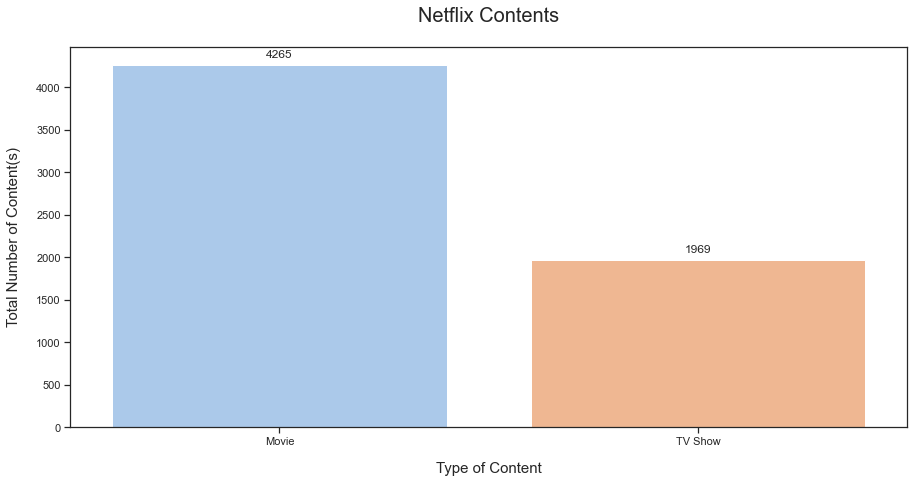

In [165]:
plt.figure(figsize=(15,7))
s = sb.barplot(x = type_x, y = type_y)
for p in s.patches:
    s.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Netflix Contents', fontsize=20, y=1.05)
plt.xlabel('Type of Content', fontsize=15, labelpad=15)
plt.ylabel('Total Number of Content(s)', fontsize=15, labelpad=15)
# plt.savefig('types.png')
plt.show()

Based on this graph, we can found movies & tv shows on Netflix, there are more movies than TV shows on Netflix.

In [166]:
moviepct = type_y[0] / (type_y[0] + type_y[1]) * 100
tvshowpct = type_y[1] / (type_y[0] + type_y[1]) * 100
print('% Movie :', moviepct,'%')
print('% TV Show :', tvshowpct,'%')

% Movie : 68.41514276547963 %
% TV Show : 31.584857234520374 %


The contents of Netflix based on this dataset are consisted of 68.4% movies and 31.6% TV shows.

#### __Rating of Contents__

In [167]:
ratingcounts = df['rating'].value_counts()
ratingcounts

TV-MA       2027
TV-14       1699
TV-PG        701
R            508
PG-13        287
NR           218
PG           184
TV-Y7        170
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             40
UR             7
NC-17          6
Name: rating, dtype: int64

Ratings for TV _(source: https://en.wikipedia.org/wiki/TV_Parental_Guidelines)_:
- TV-Y : This program is designed to be appropriate for all children.
- TV-Y7 : This program is designed for children age 7 and above.
- TV-Y7-FV : This program is designed for children age 7 and above. Programs given the "FV" content descriptor exhibit more 'fantasy violence' and are generally more intense or combative than other programs rated TV-Y7.
- TV-G : This program is suitable for all ages though they may not necessarily contain content of interest to children. 
- TV-PG : This program contains material that parents may find unsuitable for younger children.
- TV-14 : This program contains some material that many parents would find unsuitable for children under 14 years of age.
- TV-MA : This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17.

Ratings for Movies _(source: https://en.wikipedia.org/wiki/Motion_Picture_Association_of_America_film_rating_system)_:
- G : General Audiences. All ages admitted. 
- PG : Parental Guidance Suggested. Some material may not be suitable for children.
- PG-13 : Parents Strongly Cautioned. Some material may be inappropriate for children under 13.
- R : Restricted. Under 17 requires accompanying parent or adult guardian.
- NC-17 : Adults Only. No One 17 and Under Admitted.
- NR : Not Rated. Usually used if a film has not been submitted for a rating or is an uncut version of a film that was submitted.
- UR : Unrated.  Usually used if a film has not been submitted for a rating or is an uncut version of a film that was submitted. Uncut/extended versions of films that are labeled "Unrated" also contain warnings saying that the uncut version of the film contains content that differs from the theatrical release and might not be suitable for minors.

In [168]:
ratingmaturityorder = ['UR', 'NR', 'NC-17', 'TV-MA', 'R', 'TV-14', 'PG-13', 'PG', 'TV-PG', 'G', 'TV-G', 'TV-Y7-FV', 'TV-Y7', 'TV-Y'] # in decreasing order

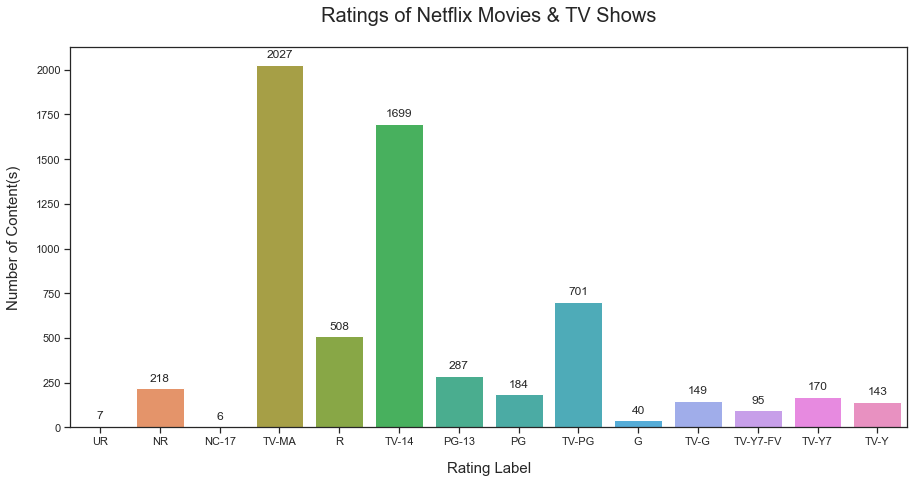

In [169]:
plt.figure(figsize=(15,7))
s = sb.countplot(x = 'rating', data = df, order = ratingmaturityorder)
for p in s.patches:
    s.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Ratings of Netflix Movies & TV Shows', fontsize=20, y=1.05)
plt.xlabel('Rating Label', fontsize=15, labelpad=15)
plt.ylabel('Number of Content(s)', fontsize=15, labelpad=15)
# plt.savefig('rating.png')
plt.show()

Rating TV-MA has the most frequency, followed by TV-14 in second place, TV-PG in third place, and R in fourth place. Based on this, it seems like the contents on Netflix are mostly targeted towards adults and teenagers. 

#### __Added Contents per Year__

In [170]:
# Add year_added column
df['year_added']=df['date_added'].dt.year
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019
1,80117401,Movie,Jandino: Whatever it Takes,,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016
2,70234439,TV Show,Transformers Prime,,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018


In [171]:
df.groupby('year_added')['type'].value_counts()

year_added  type   
2008        Movie         1
            TV Show       1
2009        Movie         2
2010        Movie         1
2011        Movie        13
2012        Movie         4
            TV Show       3
2013        Movie         6
            TV Show       6
2014        Movie        19
            TV Show       6
2015        Movie        58
            TV Show      32
2016        Movie       264
            TV Show     192
2017        Movie       913
            TV Show     387
2018        Movie      1290
            TV Show     492
2019        Movie      1546
            TV Show     803
2020        Movie       148
            TV Show      47
Name: type, dtype: int64

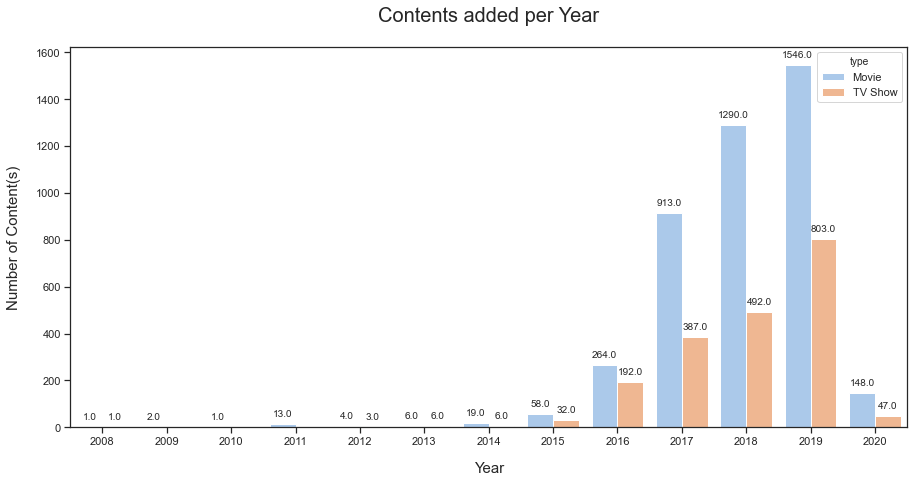

In [172]:
plt.figure(figsize=(15,7))
s = sb.countplot(x = 'year_added', hue = 'type', data = df)
for p in s.patches:
    s.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points', fontsize=10)
plt.title('Contents added per Year', fontsize=20, y=1.05)
plt.xlabel('Year', fontsize=15, labelpad = 15)
plt.ylabel('Number of Content(s)', fontsize=15, labelpad = 15)
# plt.savefig('contentaddedyearly.png')
plt.show()

We can see that Netflix is adding more and more contents each year. Information on year 2020 is not yet fully updated, that's why it seemed low in number. I believe that this number will increase with time.

#### __Content-Producing Countries__

In [173]:
df['country'].value_counts()

United States                                                   2032
India                                                            784
unknown                                                          437
United Kingdom                                                   348
Japan                                                            184
                                                                ... 
Canada, India, Thailand, United States, United Arab Emirates       1
Russia, United States                                              1
Spain, Colombia                                                    1
Germany, Belgium                                                   1
Australia, United Kingdom, United Arab Emirates, Canada            1
Name: country, Length: 555, dtype: int64

Here we can see that the contents of Netflix are produced in a lot of different countries and some contents are produced in multiple countries. 
I want to focus on the top 5 countries that produce contents available on Netflix.

In [174]:
df['country'].value_counts()[:6]

United States     2032
India              784
unknown            437
United Kingdom     348
Japan              184
South Korea        160
Name: country, dtype: int64

Turns out, there are still many contents that have missing 'country' data (these are labelled with 'unknown'). I will skip the 'unknown' label since they are morelikely to be from various countries and use the other top 5 countries which are: 'United States', 'India', 'United Kingdom', 'Japan', and 'South Korea'.

In [175]:
topcountries = df['country'].value_counts()[:6].index.tolist()
topcountries.remove('unknown')
topcountries

['United States', 'India', 'United Kingdom', 'Japan', 'South Korea']

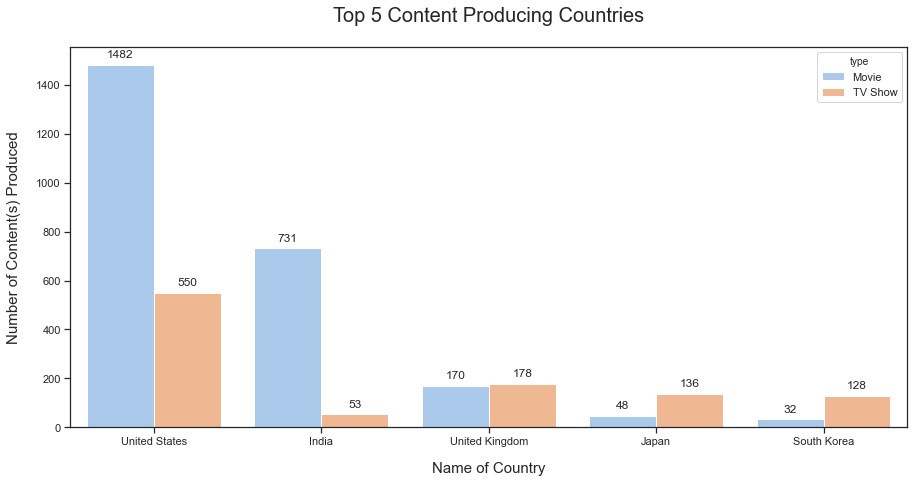

In [176]:
top5country = df.copy()[(df['country']=='United States') | (df['country']=='India') | (df['country']=='United Kingdom') | (df['country']=='Japan') | (df['country']=='South Korea')]

plt.figure(figsize=(15,7))
s = sb.countplot(x = 'country', hue = 'type', data = top5country, order=topcountries)
for p in s.patches:
    s.annotate(format(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Top 5 Content Producing Countries', fontsize=20, y=1.05)
plt.xlabel('Name of Country', fontsize=15, labelpad = 15)
plt.ylabel('Number of Content(s) Produced', fontsize=15, labelpad = 15)
# plt.savefig('producingcountries.png')
plt.show()

From this plot we can see that the US and India has more movies than TV shows on Netflix while the UK, Japan and South Korea has more TV shows than movies. 

#### __Duration of Contents__

In [177]:
# Add 'duration_num' columns with only the numeric value of the 'duration' column
duration = []
for i in df['duration']:
    x = i.split(' ')
    duration.append(x[0])
duration = pd.to_numeric(duration)
df['duration_num'] = duration
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,duration_num
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019,90
1,80117401,Movie,Jandino: Whatever it Takes,,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016,94
2,70234439,TV Show,Transformers Prime,,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018,1
3,80058654,TV Show,Transformers: Robots in Disguise,,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018,1
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017,99


In [178]:
tvshowsduration = df.copy()[df['type'] == 'TV Show']
tvshowsduration['duration_num'].value_counts()

1     1321
2      304
3      158
4       61
5       46
6       22
7       21
8       16
9        7
11       3
10       3
15       2
13       2
12       2
14       1
Name: duration_num, dtype: int64

In [179]:
moviesduration = df.copy()[df['type'] == 'Movie']

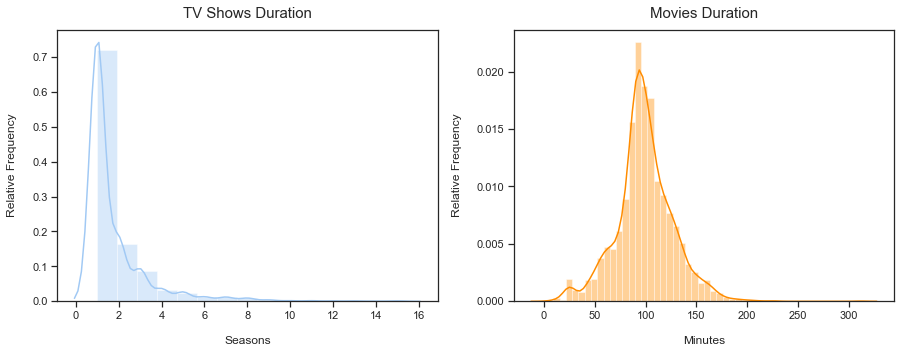

In [180]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sb.distplot(tvshowsduration['duration_num'], bins=15)
plt.title('TV Shows Duration', fontsize=15, y=1.02)
plt.xlabel('Seasons', labelpad=15)
plt.ylabel('Relative Frequency', labelpad=15)

plt.subplot(122)
sb.distplot(moviesduration['duration_num'], color = 'darkorange')
plt.title('Movies Duration', fontsize=15, y=1.02)
plt.xlabel('Minutes', labelpad=15)
plt.ylabel('Relative Frequency', labelpad=15)

# plt.savefig('duration.png')

plt.show()

From the plot, we can see that most TV shows on Netflix is around 1 - 2 seasons long while most movies on Netflix is around 75 - 125 minutes long.

In [181]:
print("Duration Information")
print("Shortest TV Shows season(s):", tvshowsduration.duration_num.min(), 'season')
print("Longest TV Shows season(s):", tvshowsduration.duration_num.max(), 'seasons')
print("Most frequent TV Shows season(s):", tvshowsduration.duration_num.mode()[0], 'season')
print("Average TV Shows season(s):", tvshowsduration.duration_num.mean(),'(', math.floor(tvshowsduration.duration_num.mean()),'-',math.ceil(tvshowsduration.duration_num.mean()), 'seasons )')

print("Shortest Movies duration:", moviesduration.duration_num.min(), 'minutes')
print("Longest Movies duration:", moviesduration.duration_num.max(), 'minutes')
print("Most frequent Movies duration:", moviesduration.duration_num.mode()[0], 'minutes')
print("Average Movies duration:", moviesduration.duration_num.mean(), 'minutes')


Duration Information
Shortest TV Shows season(s): 1 season
Longest TV Shows season(s): 15 seasons
Most frequent TV Shows season(s): 1 season
Average TV Shows season(s): 1.7795835449466735 ( 1 - 2 seasons )
Shortest Movies duration: 3 minutes
Longest Movies duration: 312 minutes
Most frequent Movies duration: 90 minutes
Average Movies duration: 99.10082063305978 minutes


### __Content Release Year__

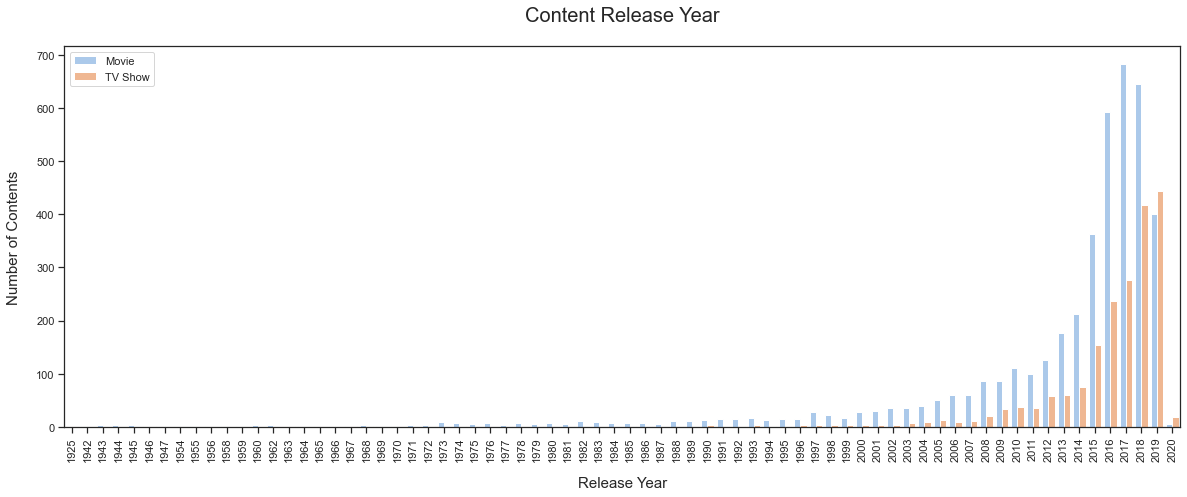

In [182]:
plt.figure(figsize=(20,7))
sb.countplot(x = 'release_year', hue = 'type', data = df)
plt.legend(loc='upper left')
plt.title('Content Release Year', fontsize=20, y=1.05)
plt.xlabel('Release Year', fontsize=15, labelpad = 15, )
plt.xticks(rotation=90)
plt.ylabel('Number of Contents', fontsize=15, labelpad = 15)
# plt.savefig('yearreleased.png')
plt.show()

Most of the contents on Netflix are newly released. According to the graph above, movies on Netflix are mostly released in 2017, 2018 and 2016 respectively. Meanwhile, they seem like having more and more TV shows each year. Most TV shows on Netflix are released in 2019, closely followed by the ones released in 2018. 

In [183]:
print("Content Release Year Information")
print("Oldest Content Release Year:", int(df.release_year.describe()['min']))
print("Latest Content Release Year:", int(df.release_year.describe()['max']))
print("Most Frequent Content Release Year:", int(df.release_year.mode()))

Content Release Year Information
Oldest Content Release Year: 1925
Latest Content Release Year: 2020
Most Frequent Content Release Year: 2018


## __III. Making Content Based Recommendation System__

To make a content-based Netlix Movies & TV Shows recommendation system I'm going to use NLP and Bag of Words approach. The goal is to find similar movies / TV shows by matching their text-based features (from 'type', 'director', 'cast', 'listed_in' and 'description' columns).

### __NLP__

NLP (Natural Language Processing) is a branch of artificial intelligence that deals with the interaction between computers and humans using the natural language.
The ultimate objective of NLP is to read, decipher, understand, and make sense of the human languages in a manner that is valuable. Most NLP techniques rely on machine learning to derive meaning from human languages. _(more on NLP on: https://becominghuman.ai/a-simple-introduction-to-natural-language-processing-ea66a1747b32)_

### 1. __Data Preprocessing__

#### Creating a new dataframe with only useful information

In [184]:
NFcols = ['title', 'type', 'director', 'cast', 'listed_in', 'description']

In [185]:
dfNF = df.copy()[NFcols]
dfNF.head()

,title,type,director,cast,listed_in,description
0,Norm of the North: King Sized Adventure,Movie,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Jandino: Whatever it Takes,Movie,,Jandino Asporaat,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,Transformers Prime,TV Show,,"Peter Cullen, Sumalee Montano, Frank Welker, J...",Kids' TV,"With the help of three human allies, the Autob..."
3,Transformers: Robots in Disguise,TV Show,,"Will Friedle, Darren Criss, Constance Zimmer, ...",Kids' TV,When a prison ship crash unleashes hundreds of...
4,#realityhigh,Movie,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",Comedies,When nerdy high schooler Dani finally attracts...


#### Checking the new dataframe shape & info

In [186]:
dfNF.shape

(6234, 6)

In [187]:
dfNF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        6234 non-null   object
 1   type         6234 non-null   object
 2   director     6234 non-null   object
 3   cast         6234 non-null   object
 4   listed_in    6234 non-null   object
 5   description  6234 non-null   object
dtypes: object(6)
memory usage: 292.3+ KB


#### Extract keywords from *'description'* column

I'm going to use RAKE (Rapid Automatic Keyword Extraction) to extract the main keywords from the *'description'* column.

_"Rapid Automatic Keyword Extraction (RAKE) is a well-known keyword extraction method which uses a list of stopwords and phrase delimiters to detect the most relevant words or phrases in a piece of text." Source: https://monkeylearn.com/keyword-extraction/)_

In [188]:
desckeywords = []
R = Rake() # deafult => uses stopwords for english from NLTK and all puntuation characters

for index, row in dfNF.iterrows():
    R.extract_keywords_from_text(row['description'])            # to extract keywords from text
    key_words_dict_scores = R.get_word_degrees()                # to get keyword phrases ranked highest to lowest
    desckeywords.append(list(key_words_dict_scores.keys()))     # get the keys of key_words_dict_scores, make that into a list, append the list to desckeywords

dfNF['desckeywords'] = desckeywords
dfNF.head(3)

,title,type,director,cast,listed_in,description,desckeywords
0,Norm of the North: King Sized Adventure,Movie,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,"[stolen, artifact, evil, archaeologist, first,..."
1,Jandino: Whatever it Takes,Movie,,Jandino Asporaat,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,"[rousing, rendition, comedy, show, challenges,..."
2,Transformers Prime,TV Show,,"Peter Cullen, Sumalee Montano, Frank Welker, J...",Kids' TV,"With the help of three human allies, the Autob...","[megatron, three, human, allies, help, protect..."


Aside from the description columns, I want to process the text-based data on 'director', 'cast', 'listed_in', and 'type' columns too. I think the information can be useful for creating the recommendation model later. 

#### Splitting the text on *'director'*, *'cast'*, and *'listed_in'* columns _(per name and genre)_, converting all words into lowercase & removing whitespaces

I need to make each director, cast and genre a unique value. To do so, I'm splitting the values on each cell by the comma symbol to separate each names and genres. Then, I use looping to turn all words into lowercase and to remove whitespaces by replacing every space (' ') with an empty string ('').

In [189]:
dfNF['director'] = dfNF['director'].map(lambda x: x.split(','))
dfNF['cast'] = dfNF['cast'].map(lambda x: x.split(','))
dfNF['listed_in'] = dfNF['listed_in'].map(lambda x: x.split(','))

for index, row in dfNF.iterrows():
    row['director'] = [x.lower().replace(' ','') for x in row['director']]
    row['cast'] = [x.lower().replace(' ','') for x in row['cast']]
    row['listed_in'] = [x.lower().replace(' ','') for x in row['listed_in']]

#### Convert values in *'type'* columns into lowercase and remove the whitespaces

In [190]:
dfNF['type'] = dfNF['type'].str.lower().replace('tv show','tvshow')
dfNF.head()

,title,type,director,cast,listed_in,description,desckeywords
0,Norm of the North: King Sized Adventure,movie,"[richardfinn, timmaltby]","[alanmarriott, andrewtoth, briandobson, coleho...","[children&familymovies, comedies]",Before planning an awesome wedding for his gra...,"[stolen, artifact, evil, archaeologist, first,..."
1,Jandino: Whatever it Takes,movie,[],[jandinoasporaat],[stand-upcomedy],Jandino Asporaat riffs on the challenges of ra...,"[rousing, rendition, comedy, show, challenges,..."
2,Transformers Prime,tvshow,[],"[petercullen, sumaleemontano, frankwelker, jef...",[kids'tv],"With the help of three human allies, the Autob...","[megatron, three, human, allies, help, protect..."
3,Transformers: Robots in Disguise,tvshow,[],"[willfriedle, darrencriss, constancezimmer, kh...",[kids'tv],When a prison ship crash unleashes hundreds of...,"[decepticons, bumblebee, leads, earth, protect..."
4,#realityhigh,movie,[fernandolebrija],"[nestacooper, katewalsh, johnmichaelhiggins, k...",[comedies],When nerdy high schooler Dani finally attracts...,"[cross, hairs, social, media, celebrity, lands..."


#### Creating a new column that contains all the text values from every columns except the 'title' column

I will name the new columns as BoW (short for Bag of Words). I will then do vectorization on the words in this column and use the results for the machine learning algorithm.

In [191]:
dfNF['director'] = [' '.join(map(str, i)) for i in dfNF['director']]
dfNF['cast'] = [' '.join(map(str, i)) for i in dfNF['cast']]
dfNF['listed_in'] = [' '.join(map(str, i)) for i in dfNF['listed_in']]
dfNF['desckeywords'] = [' '.join(map(str, i)) for i in dfNF['desckeywords']]
dfNF.head(3)

,title,type,director,cast,listed_in,description,desckeywords
0,Norm of the North: King Sized Adventure,movie,richardfinn timmaltby,alanmarriott andrewtoth briandobson colehoward...,children&familymovies comedies,Before planning an awesome wedding for his gra...,stolen artifact evil archaeologist first aweso...
1,Jandino: Whatever it Takes,movie,,jandinoasporaat,stand-upcomedy,Jandino Asporaat riffs on the challenges of ra...,rousing rendition comedy show challenges raisi...
2,Transformers Prime,tvshow,,petercullen sumaleemontano frankwelker jeffrey...,kids'tv,"With the help of three human allies, the Autob...",megatron three human allies help protect earth...


In [192]:
dfNF['BoW'] = dfNF['type'] + ' ' + dfNF['director'] + ' ' + dfNF['cast'] + ' ' + dfNF['listed_in'] + ' ' + dfNF['desckeywords']
dfNF.head()

,title,type,director,cast,listed_in,description,desckeywords,BoW
0,Norm of the North: King Sized Adventure,movie,richardfinn timmaltby,alanmarriott andrewtoth briandobson colehoward...,children&familymovies comedies,Before planning an awesome wedding for his gra...,stolen artifact evil archaeologist first aweso...,movie richardfinn timmaltby alanmarriott andre...
1,Jandino: Whatever it Takes,movie,,jandinoasporaat,stand-upcomedy,Jandino Asporaat riffs on the challenges of ra...,rousing rendition comedy show challenges raisi...,movie jandinoasporaat stand-upcomedy rousing ...
2,Transformers Prime,tvshow,,petercullen sumaleemontano frankwelker jeffrey...,kids'tv,"With the help of three human allies, the Autob...",megatron three human allies help protect earth...,tvshow petercullen sumaleemontano frankwelker...
3,Transformers: Robots in Disguise,tvshow,,willfriedle darrencriss constancezimmer kharyp...,kids'tv,When a prison ship crash unleashes hundreds of...,decepticons bumblebee leads earth protect huma...,tvshow willfriedle darrencriss constancezimme...
4,#realityhigh,movie,fernandolebrija,nestacooper katewalsh johnmichaelhiggins keith...,comedies,When nerdy high schooler Dani finally attracts...,cross hairs social media celebrity lands ex lo...,movie fernandolebrija nestacooper katewalsh jo...


#### Creating another dataframe that contains only the *'title'* and *'BoW'* columns

In [193]:
dfNFRec = dfNF.copy()[['title', 'BoW']]
dfNFRec.head()

,title,BoW
0,Norm of the North: King Sized Adventure,movie richardfinn timmaltby alanmarriott andre...
1,Jandino: Whatever it Takes,movie jandinoasporaat stand-upcomedy rousing ...
2,Transformers Prime,tvshow petercullen sumaleemontano frankwelker...
3,Transformers: Robots in Disguise,tvshow willfriedle darrencriss constancezimme...
4,#realityhigh,movie fernandolebrija nestacooper katewalsh jo...


### 2. __Creating Model__

#### Using ```CountVectorizer()``` to convert *'BoW'* column into a vector form

CountVectorizer counts the number of time each words appeared in the text.

In [194]:
cv = CountVectorizer()
countmatrix = cv.fit_transform(dfNF['BoW'])
# print(cv.get_feature_names())
print(countmatrix.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### Calculate cosine similarity score using ```cosine_similarity```

The cosine similarity score reflects the similarity between each movies / TV shows. This can be used to find similar movies / TV shows to recommend to user.

~ 1 $\rightarrow$ very similar <br>
~ 0 $\rightarrow$ not similar

In [195]:
cosScore = cosine_similarity(countmatrix.toarray())
cosScore

array([[1.        , 0.04233338, 0.        , ..., 0.08980265, 0.        ,
        0.        ],
       [0.04233338, 1.        , 0.04622502, ..., 0.05892557, 0.        ,
        0.        ],
       [0.        , 0.04622502, 1.        , ..., 0.        , 0.03846154,
        0.03846154],
       ...,
       [0.08980265, 0.05892557, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.03846154, ..., 0.        , 1.        ,
        0.07692308],
       [0.        , 0.        , 0.03846154, ..., 0.        , 0.07692308,
        1.        ]])

#### Creating a Pandas Series containing each Movies / TV Shows title 

In [196]:
indices = pd.Series(dfNFRec['title'].str.lower())
indices

0           norm of the north: king sized adventure
1                        jandino: whatever it takes
2                                transformers prime
3                  transformers: robots in disguise
4                                      #realityhigh
                           ...                     
6229                                   red vs. blue
6230                                          maron
6231         little baby bum: nursery rhyme friends
6232    a young doctor's notebook and other stories
6233                                        friends
Name: title, Length: 6234, dtype: object

#### Creating a recommender function

In [197]:
def recommend(title, cosScore=cosScore):
    idx = indices[indices == title].index[0]
    simscores = list(enumerate(cosScore[idx]))                      
    simscores = sorted(simscores, key=lambda x: x[1], reverse=True)
    simscores = simscores[1:11]
    movieshowindices = [i[0] for i in simscores]
    return df.iloc[movieshowindices]

#### Running & testing out the recommender

__#1 Test__

In [198]:
ILike = "Reply 1994"
recommendation = recommend(ILike.lower())
recommendation

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,duration_num
4742,70297144,TV Show,Reply 1997,Shin Won-ho,"Jung Eun-ji, Seo In-guk, Shin So-yul, Ji-won E...",South Korea,2019-08-08,2012,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...","As a teen, Shi Won was obsessed with a boy ban...",2019,1
3552,80188351,TV Show,Reply 1988,,"Lee Hye-ri, Park Bo-gum, Ryu Jun-yeol, Ko Kyou...",South Korea,2020-01-01,2015,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Take a nostalgic trip back to the late 1980s t...,2020,1
5941,81026700,TV Show,My First First Love,,"Ji Soo, Jung Chae-yeon, Jinyoung, Choi Ri, Kan...",South Korea,2019-07-26,2019,TV-PG,2 Seasons,"International TV Shows, Korean TV Shows, Roman...","Due to various personal reasons, a group of Yu...",2019,2
2770,80991107,TV Show,Mr. Sunshine,Lee Eung-bok,"Lee Byung-hun, Kim Tae-ri, Yoo Yeon-seok, Kim ...",South Korea,2018-07-08,2018,TV-MA,1 Season,"International TV Shows, Korean TV Shows, Roman...",A young boy who ends up in the U.S. after the ...,2018,1
6093,80128686,TV Show,"Hello, My Twenties!",,"Ye-ri Han, Seung-Yeon Han, Eun-bin Park, Hwa-y...",South Korea,2017-12-18,2017,TV-14,2 Seasons,"International TV Shows, Korean TV Shows, Roman...","With different personalities, life goals and t...",2017,2
3918,80154508,TV Show,Love for Ten: Generation of Youth,,"Sung-yeol Lee, Ji-hyun Nam, Clara Lee, Jin Won",South Korea,2017-02-17,2013,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",A nerdy engineering student falls for a pretty...,2017,1
474,81166978,TV Show,"Bring It On, Ghost",Park Joon-hwa,"Taecyeon, Kim So-hyun, Kwon Yul, Kim Sang-ho, ...",South Korea,2019-10-30,2016,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",A college student with psychic abilities takes...,2019,1
3292,80180171,TV Show,Kingdom,Kim Seong-hun,"Ju Ji-hoon, Ryu Seung-ryong, Bae Doona, Kim Sa...","South Korea, United States",2019-01-25,2019,TV-MA,1 Season,"International TV Shows, Korean TV Shows, TV Ac...",While strange rumors about their ill king grip...,2019,1
787,81166946,TV Show,Cheese in the Trap,Lee Yoon-jung,"Park Hae-Jin, Kim Go-eun, Seo Kang-jun, Lee Su...",South Korea,2019-10-01,2016,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...","In this adaptation of a popular webtoon, a poo...",2019,1
1270,81033650,TV Show,Inheritors,,"Lee Min-ho, Park Shin-hye, Kim Woo-bin, Krysta...",South Korea,2019-11-15,2013,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...","After a chance encounter in LA, two teens from...",2019,1


__#2 Test__

In [199]:
ILike2 = "Black Panther"
recommendation2 = recommend(ILike2.lower())
recommendation2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,duration_num
3036,70101345,Movie,Inkheart,Iain Softley,"Brendan Fraser, Paul Bettany, Helen Mirren, Ji...","Germany, United Kingdom, United States",2019-07-01,2008,PG,106 min,"Action & Adventure, Children & Family Movies, ...","Unbeknownst to his 12-year-old daughter, a boo...",2019,106
810,60023597,Movie,Men in Black II,Barry Sonnenfeld,"Tommy Lee Jones, Will Smith, Rip Torn, Lara Fl...",United States,2019-10-01,2002,PG-13,88 min,"Action & Adventure, Comedies, Sci-Fi & Fantasy",Will Smith and Tommy Lee Jones reprise their r...,2019,88
3184,80220814,Movie,Solo: A Star Wars Story,Ron Howard,"Alden Ehrenreich, Woody Harrelson, Emilia Clar...",United States,2019-01-09,2018,PG-13,135 min,"Action & Adventure, Children & Family Movies, ...",A young Han Solo tries to settle an old score ...,2019,135
3185,81046962,Movie,Solo: A Star Wars Story (Spanish Version),Ron Howard,"Alden Ehrenreich, Woody Harrelson, Emilia Clar...",United States,2019-01-09,2018,PG-13,135 min,"Action & Adventure, Children & Family Movies, ...",A young Han Solo tries to settle an old score ...,2019,135
2556,80231601,Movie,The Darkest Dawn,,,United Kingdom,2018-06-23,2016,TV-MA,75 min,"Action & Adventure, International Movies, Sci-...",An aspiring filmmaker records the chaos of an ...,2018,75
1409,70047101,Movie,Spider-Man 3,Sam Raimi,"Tobey Maguire, Kirsten Dunst, James Franco, Th...",United States,2019-11-01,2007,PG-13,139 min,"Action & Adventure, Sci-Fi & Fantasy",The seemingly invincible Spider-Man goes up ag...,2019,139
1369,516788,Movie,Forbidden Planet,Fred M. Wilcox,"Leslie Nielsen, Walter Pidgeon, Anne Francis, ...",United States,2019-11-01,1956,G,98 min,"Action & Adventure, Classic Movies, Sci-Fi & F...","A pulp-fiction sci-fi classic, Forbidden Plane...",2019,98
5057,70119812,Movie,Clash of the Titans,Louis Leterrier,"Sam Worthington, Liam Neeson, Ralph Fiennes, J...","United States, United Kingdom, Australia",2019-08-01,2010,PG-13,106 min,"Action & Adventure, Sci-Fi & Fantasy",If he is to save the life of the beautiful Pri...,2019,106
3086,70084795,Movie,The Forbidden Kingdom,Rob Minkoff,"Jackie Chan, Jet Li, Collin Chou, Liu Yifei, L...","United States, China",2019-07-01,2008,PG-13,104 min,"Action & Adventure, Sci-Fi & Fantasy",Jackie Chan and Jet Li star in this rousing ad...,2019,104
2708,20129240,Movie,Small Soldiers,Joe Dante,"Kirsten Dunst, Gregory Smith, Jay Mohr, Phil H...",United States,2019-06-01,1998,PG-13,110 min,"Action & Adventure, Comedies, Sci-Fi & Fantasy","When the Commando Elite, a group of toy action...",2019,110


__#3 Test__

In [200]:
ILike3 = "Naruto Shippuden: The Movie"
recommendation3 = recommend(ILike3.lower())
recommendation3

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,duration_num
722,70105699,Movie,Naruto Shippûden the Movie: Bonds,Hajime Kamegaki,"Junko Takeuchi, Noriaki Sugiyama, Chie Nakamur...",Japan,2016-10-15,2008,TV-14,93 min,"Action & Adventure, Anime Features, Internatio...",When strange ninjas ambush the village of Kono...,2016,93
381,80152537,Movie,Naruto Shippuden : Blood Prison,Masahiko Murata,"Junko Takeuchi, Chie Nakamura, Rikiya Koyama, ...",Japan,2017-09-01,2011,TV-14,102 min,"Action & Adventure, Anime Features, Internatio...",Mistakenly accused of an attack on the Fourth ...,2017,102
385,70108386,Movie,Naruto the Movie 3: Guardians of the Crescent ...,Toshiyuki Tsuru,"Junko Takeuchi, Chie Nakamura, Yoichi Masukawa...",Japan,2017-09-01,2006,NR,95 min,"Action & Adventure, Anime Features, Internatio...",Exuberant ninja Naruto teams up with his pals ...,2017,95
382,80045673,Movie,Naruto Shippûden the Movie: The Will of Fire,Masahiko Murata,"Junko Takeuchi, Kazuhiko Inoue, Chie Nakamura,...",Japan,2017-09-01,2009,TV-14,96 min,"Action & Adventure, Anime Features, Internatio...",When four out of five ninja villages are destr...,2017,96
384,70101321,Movie,Naruto the Movie 2: Legend of the Stone of Gelel,Hirotsugu Kawasaki,"Junko Takeuchi, Showtaro Morikubo, Chie Nakamu...",Japan,2017-09-01,2005,NR,97 min,"Action & Adventure, Anime Features, Internatio...","While on a mission to return a missing pet, Na...",2017,97
5633,70205012,TV Show,Naruto,Hayato Date,"Junko Takeuchi, Chie Nakamura, Noriaki Sugiyam...",Japan,2019-09-01,2008,TV-PG,9 Seasons,"Anime Series, International TV Shows","Guided by the spirit demon within him, orphane...",2019,9
383,70275937,Movie,Naruto Shippuden: The Movie: The Lost Tower,Masahiko Murata,"Junko Takeuchi, Chie Nakamura, Rikiya Koyama, ...",Japan,2017-09-01,2010,TV-14,85 min,"Action & Adventure, Anime Features, Internatio...","When Naruto is sent to recover a missing nin, ...",2017,85
386,70074559,Movie,Naruto the Movie: Ninja Clash in the Land of Snow,Tensai Okamura,"Yuri Lowenthal, Maile Flanagan, Sam Regal, Cam...",Japan,2017-09-01,2004,NR,83 min,"Action & Adventure, Anime Features, Internatio...","Naruto, Sasuke and Sakura learn they'll be pro...",2017,83
371,70052492,Movie,Inuyasha the Movie - L'isola del fuoco scarlatto,Toshiya Shinohara,"Kappei Yamaguchi, Satsuki Yukino, Koji Tsujita...",Japan,2017-09-01,2004,NR,88 min,"Action & Adventure, Anime Features, Internatio...","Ai, a young half-demon who has escaped from Ho...",2017,88
4024,81048910,Movie,LEGO Ninjago: Masters of Spinjitzu: Day of the...,,,"Denmark, China",2019-02-01,2016,TV-Y7-FV,44 min,"Action & Adventure, Children & Family Movies",Cole finds himself trapped in Yang's temple af...,2019,44


__#4 Test__

In [201]:
ILike4 = "NCIS"
recommendation4 = recommend(ILike4.lower())
recommendation4

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,duration_num
6164,80114855,TV Show,MINDHUNTER,,"Jonathan Groff, Holt McCallany, Anna Torv, Cot...",United States,2019-08-16,2019,TV-MA,2 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries",In the late 1970s two FBI agents expand crimin...,2019,2
5879,70153390,TV Show,Criminal Minds,,"Mandy Patinkin, Joe Mantegna, Thomas Gibson, S...","United States, Canada",2017-06-30,2017,TV-14,12 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries",This intense police procedural follows a group...,2017,12
5842,80024057,TV Show,How to Get Away with Murder,,"Viola Davis, Billy Brown, Alfred Enoch, Jack F...",United States,2019-03-30,2018,TV-14,5 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries",Brilliant criminal defense attorney and law pr...,2019,5
182,80176878,TV Show,Manhunt,,"Sam Worthington, Paul Bettany, Chris Noth, Jer...",United States,2017-09-19,2017,TV-14,1 Season,"Crime TV Shows, TV Dramas, TV Mysteries",Faced with few clues and an increasingly panic...,2017,1
3966,80198794,TV Show,Re:Mind,,Keyakizaka46,Japan,2018-02-15,2017,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries","Eleven high school classmates awaken, restrain...",2018,1
5022,80163530,TV Show,Persona,,"Loo Aye Keng, Kyo, Jojo Goh, Fabian Loo, Emily...",unknown,2017-08-14,2015,TV-PG,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",A private investigation firm takes on sensitiv...,2017,1
6175,80175802,TV Show,The Sinner,,"Jessica Biel, Bill Pullman, Christopher Abbott...",United States,2019-08-01,2018,NR,2 Seasons,"Crime TV Shows, TV Dramas, TV Mysteries",When a young mother inexplicably stabs a stran...,2019,2
4793,80185065,TV Show,Inside the Criminal Mind,,,"United States, Czech Republic",2018-08-31,2018,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Explore the psychological machinations and imm...,2018,1
216,81044365,TV Show,Cold Case Files,,,United States,2019-09-15,2017,TV-14,1 Season,"Crime TV Shows, Docuseries",Masterful detectives utilize forensic science ...,2019,1
61,80113641,TV Show,Frequency,,"Peyton List, Riley Smith, Mekhi Phifer, Devin ...",United States,2017-09-04,2016,TV-14,1 Season,"Crime TV Shows, TV Dramas, TV Mysteries",A detective seizes a precious opportunity to c...,2017,1


__#5 Test__

In [202]:
ILike5 = "Pocoyo & Cars"
recommendation5 = recommend(ILike5.lower())
recommendation5

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,duration_num
1860,80235853,Movie,Pocoyo Carnival,,"Stephen Fry, Alex Marty",unknown,2018-05-01,2015,TV-Y,22 min,Movies,"To celebrate the carnival, everyone learns to ...",2018,22
1861,80236099,Movie,Pocoyo Halloween: Space Halloween,,"Stephen Fry, Montana Smedley",United States,2018-05-01,2015,TV-G,40 min,Movies,Pocoyo and his friends have a costume contest ...,2018,40
1863,80236224,Movie,Pocoyo Special Sports,"Guillermo Garcia, David Cantolla",,unknown,2018-05-01,2016,TV-Y,24 min,Movies,Everyone is getting excited for the games. Poc...,2018,24
1859,80235767,Movie,Pocoyo & The Space Circus,Alfonso Rodríguez,"Stephen Fry, Carys Doyle",Spain,2018-05-01,2008,TV-G,25 min,Movies,Acrobatic aliens arrive on spaceships and perf...,2018,25
1862,80235854,Movie,Pocoyo Halloween: Spooky Movies,,"Stephen Fry, Montana Smedley",unknown,2018-05-01,2014,TV-G,22 min,Movies,Pocoyo finds a special toy and plays new games...,2018,22
6015,70288470,TV Show,Pocoyo,,"Stephen Fry, Alex Marty","Spain, United Kingdom",2019-01-10,2017,TV-Y,4 Seasons,"Kids' TV, Spanish-Language TV Shows",Discovery is the name of the game for friendly...,2019,4
2558,80238351,Movie,Yoko and His Friends,,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...","Russia, Spain",2018-06-23,2015,TV-Y,78 min,Children & Family Movies,"Vik meets new friends in a new city, where the...",2018,78
2549,80087548,TV Show,Justin Time GO!,,"Drew Davis, Scott McCord, Jenna Warren",Canada,2016-06-24,2016,TV-Y,1 Season,Kids' TV,A young boy's imagination takes him throughout...,2016,1
1107,81035121,Movie,True: Winter Wishes,,"Michela Luci, Jamie Watson, Eric Peterson, Ann...",unknown,2019-11-26,2019,TV-Y,46 min,Movies,An ice crystal from a frosty realm is freezing...,2019,46
1429,81035120,Movie,True: Grabbleapple Harvest,,"Michela Luci, Jamie Watson, Eric Peterson, Ann...",unknown,2019-11-01,2019,TV-Y,24 min,Movies,It's Grabbleapple harvest season in the Rainbo...,2019,24


#### Saving Model using Joblib

In [203]:
joblib.dump(countmatrix, 'CVJoblib')

['CVJoblib']

#### Saving df & dfNFRec as csv (to display on dashboard)

In [204]:
df.to_csv('dfcleaned.csv', index = False, header = True)

In [205]:
dfNFRec.to_csv('dfNFRec.csv', index = False, header = True)

## __IV. Results & Conclusion__

_[Finding what contents are available on Netflix]_

- We can watch movies and TV shows on Netflix
- There are more movies than TV shows, being 68.4% of the contents are movies and 31.6%  are TV shows
- The contents are mostly targeted on adults and teenagers/older kids users
- Most contents are produced in the US, India, UK, Japan and South Korea respectively
- Most of the TV shows have around 1-2 seasons and most the movies are around 90 minutes long
- Although there are some classic contents available, most of the contents on Netflix are newly released
- Netflix adds more and more contents each year, the pattern shows that it's expected to increase in the future

Netlix contents are consisted of __movies and TV shows__. A lot of them are __new-released__, __not very long in duration__ and __mostly targeted for older audiences (adults & teenagers)__. There are contents from a lot of different countries but __the majority of them are produced in the US, India, UK, Japan and South Korea__. __New contents are added more by each year__ and the pattern shows that __the numbers are expected to increase in the future.__


_[Making a simple content-based recommendation system by matching text-based features to identify similar movies / TV shows]_

- I have tested the model by inputing various movie and TV show titles. __The model works nicely.__ It give me __appropriate movies and TV shows recommendation with similar genres, plot, casts and/or directors as the one I inputed.__
- This simple content-based recommendation system uses NLP and Bag of Words to find similar movies / TV shows to recommend by matching text-based features. It still has rooms for further developments to give better product recommendation to prospective users. 